# **Digit Decoder**

**The primary objective of this project is to design and implement a machine learning model capable of accurately predicting handwritten digits,The digit dataset consists of 8x8 pixel images of digits.The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.**

# **Import Library**

In [7]:
#for reading dataframes
import pandas as pd

In [8]:
#for nuerical manipulation
import numpy as np

In [9]:
#for data visualization
import matplotlib.pyplot as plt

# **Import Data**

In [35]:
#importing dataset from sklearn library
from sklearn.datasets import load_digits

In [2]:
df=load_digits()

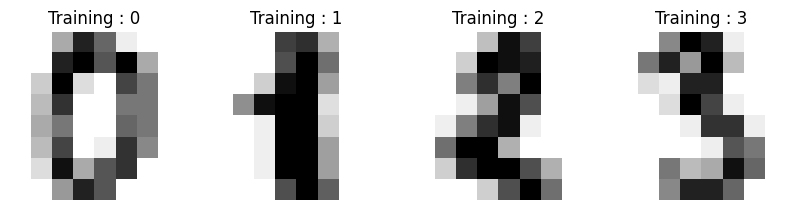

In [6]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title("Training : %i" % label)

# **Data Preprocessing**

In [38]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [14]:
n_samples=len(df.images)
data=df.images.reshape(n_samples,-1)

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data=data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(data,df.target,test_size=0.3)

In [26]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier()

In [29]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

# **Predict Test Data**

In [30]:
Y_pred=rf.predict(X_test)

In [31]:
Y_pred

array([1, 7, 3, 3, 7, 7, 7, 1, 9, 9, 6, 6, 0, 7, 9, 3, 8, 0, 9, 2, 0, 7,
       9, 4, 4, 2, 1, 3, 0, 3, 1, 2, 9, 8, 4, 9, 5, 7, 8, 7, 0, 1, 5, 3,
       4, 6, 6, 9, 9, 0, 6, 5, 8, 0, 0, 4, 9, 2, 6, 2, 2, 6, 1, 9, 6, 5,
       2, 9, 7, 9, 6, 7, 8, 4, 1, 7, 0, 9, 4, 4, 3, 4, 6, 7, 9, 8, 9, 5,
       1, 7, 4, 3, 2, 6, 3, 8, 3, 7, 4, 4, 0, 1, 8, 1, 1, 8, 0, 1, 6, 6,
       6, 1, 6, 9, 2, 4, 3, 4, 7, 6, 6, 5, 5, 4, 8, 5, 2, 1, 8, 7, 9, 9,
       4, 9, 1, 3, 1, 2, 6, 0, 8, 5, 9, 7, 6, 6, 9, 0, 9, 8, 7, 5, 3, 7,
       0, 8, 9, 3, 8, 1, 1, 4, 1, 0, 0, 3, 5, 3, 0, 9, 1, 4, 7, 2, 4, 4,
       9, 5, 7, 8, 5, 8, 7, 3, 9, 9, 4, 5, 5, 6, 9, 8, 5, 6, 4, 2, 6, 4,
       0, 0, 5, 8, 2, 4, 5, 1, 5, 8, 6, 5, 1, 6, 8, 4, 4, 1, 8, 5, 8, 3,
       2, 8, 2, 4, 8, 1, 0, 2, 8, 2, 9, 5, 0, 6, 4, 4, 5, 7, 9, 7, 3, 7,
       7, 9, 7, 3, 4, 0, 1, 9, 6, 3, 2, 0, 6, 0, 0, 4, 4, 4, 5, 8, 7, 3,
       9, 2, 6, 1, 9, 3, 6, 5, 9, 1, 6, 7, 9, 8, 3, 7, 3, 6, 8, 3, 4, 3,
       7, 3, 9, 5, 3, 0, 3, 3, 3, 8, 7, 4, 3, 1, 4,

# **Model Accuracy**

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
confusion_matrix(Y_test,Y_pred)

array([[46,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  1, 48,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  2, 58]])

In [34]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        42
           3       0.97      0.98      0.98        61
           4       0.98      0.97      0.98        64
           5       0.94      0.96      0.95        50
           6       1.00      0.98      0.99        56
           7       0.91      1.00      0.95        50
           8       0.96      0.92      0.94        52
           9       0.97      0.92      0.94        63

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

